# Documentation

This assignment is consists of 3 main codes to evaluate the naive approach and the dynamic progamming approach for displaying the disparity map as well as the third one is for computing the surface normal and 3D triangulation.

In order to run the naive program, the terminal should be written in it:
./OpenCV_naive_stereo (image_1 path) (image_2 path) (name of the output file) window_size

Although to run the dynamic programming program, the terminal should be written in it:
./OpenCV_dp_stereo (image_1 path) (image_2 path) (name of the output file) window_size lambada

To run the code of computing the normals and 3D triangulation:
./surface_normal.py (radius of KDTreeSearch to compute normals) (number of neighboors) (downsampling voxel size) (radius of ball pivoting) (path of the point cloud generated from DP) (name of the output file with extension xyzn)


This documentation includes evaluation of six different pairs of images of some metrics as Sum of squared difference, Normalized cross correletion, and Structural similarity index. Also, a comparison between the time taken in the naive "dotted line" and the DP "line" in each pair is included.

Most of the pairs in the dynamic progarmming approach are having the optimal lambada is *100* and window size *3* which give more smooth and less noisy disparity maps. But, with pairs that having more details, the lambada is increased to *250* to have more details shown in the disparity.

When the window size increase, the lambada also increased to have more fine details shown as with window size *5* and *7*; the lambada is raised to *500* to reduce the noise in the disparity map.

Consequently, there are two files includes the point cloud and normals for pair 1 and 4 which can be shown in meshlab.

In [2]:
import sys
import numpy as np
import cv2
from PIL import Image
from SSIM_PIL import compare_ssim
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

First Pair

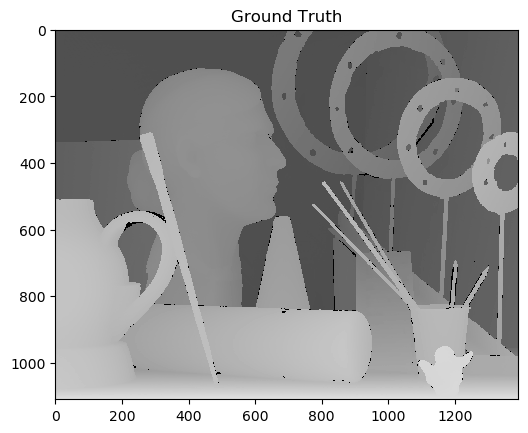

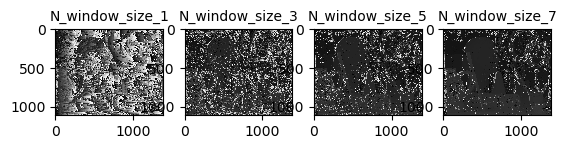

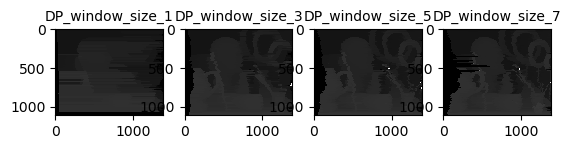

In [109]:
## Ground Truth
gt1=Image.open("../dataset/pair_1/disp1.png").convert("L")

## Naive
pair_1_Naive_1=Image.open("../dataset/pair_1/results/window_size_1/naive_1_naive.png").convert("L")
pair_1_Naive_3 = Image.open('../dataset/pair_1/results/window_size_3/naive_3_naive.png').convert("L")
pair_1_Naive_5 = Image.open('../dataset/pair_1/results/window_size_5/naive_5_naive.png').convert("L")
pair_1_Naive_7 = Image.open('../dataset/pair_1/results/window_size_7/naive_7_naive.png').convert("L")

## Dynamic Programming
pair_1_DP_1 = Image.open('../dataset/pair_1/results/window_size_1/dp_1_100_dynamic.png').convert("L")
pair_1_DP_3 = Image.open('../dataset/pair_1/results/window_size_3/dp_3_100_dynamic.png').convert("L")
pair_1_DP_5 = Image.open('../dataset/pair_1/results/window_size_5/dp_5_100_dynamic.png').convert("L")
pair_1_DP_7 = Image.open('../dataset/pair_1/results/window_size_7/dp_7_100_dynamic.png').convert("L")

## Plot
plt.imshow(gt1,cmap='gray', vmin=0, vmax=255)
plt.title('Ground Truth')

f1 = plt.figure()
f1.add_subplot(1,4, 1)
plt.imshow(pair_1_Naive_1,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_1', fontsize=10)
f1.add_subplot(1,4, 2)
plt.imshow(pair_1_Naive_3,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_3', fontsize=10)
f1.add_subplot(1,4, 3)
plt.imshow(pair_1_Naive_5,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_5', fontsize=10)
f1.add_subplot(1,4, 4)
plt.imshow(pair_1_Naive_7,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_7', fontsize=10)

f2 = plt.figure()
f2.add_subplot(1,4, 1)
plt.imshow(pair_1_DP_1,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_1', fontsize=10)
f2.add_subplot(1,4, 2)
plt.imshow(pair_1_DP_3,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_3', fontsize=10)
f2.add_subplot(1,4, 3)
plt.imshow(pair_1_DP_5,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_5', fontsize=10)
f2.add_subplot(1,4, 4)
plt.imshow(pair_1_DP_7,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_7', fontsize=10)
plt.show()

Second Pair

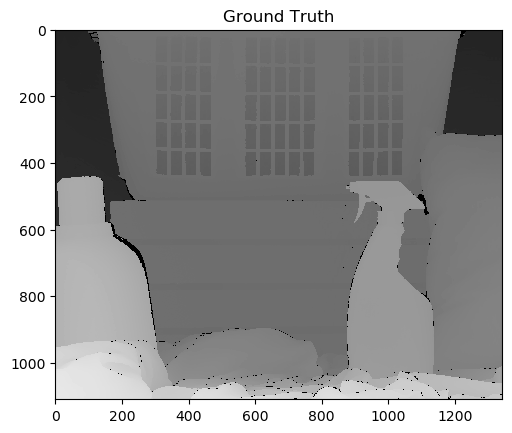

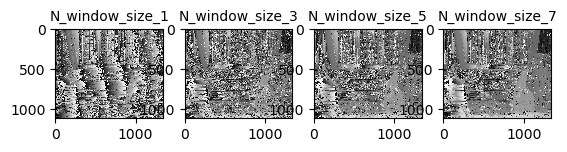

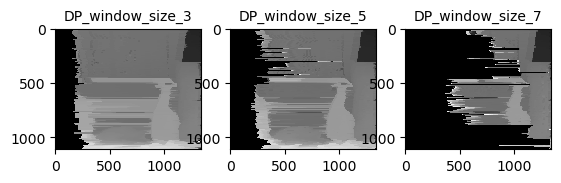

In [110]:
## Ground Truth
gt2=Image.open("../dataset/pair_2/disp1.png").convert("L")

## Naive
pair_2_Naive_1 = Image.open("../dataset/pair_2/results/window_size_1/naive_1_naive.png").convert("L")
pair_2_Naive_3 = Image.open('../dataset/pair_2/results/window_size_3/naive_3_naive.png').convert("L")
pair_2_Naive_5 = Image.open('../dataset/pair_2/results/window_size_5/naive_5_naive.png').convert("L")
pair_2_Naive_7 = Image.open('../dataset/pair_2/results/window_size_7/naive_7_naive.png').convert("L")

## Dynamic Programming
pair_2_DP_3 = Image.open('../dataset/pair_2/results/window_size_3/dp_3_100_dynamic.png').convert("L")
pair_2_DP_5 = Image.open('../dataset/pair_2/results/window_size_5/dp_5_100_dynamic.png').convert("L")
pair_2_DP_7 = Image.open('../dataset/pair_2/results/window_size_7/dp_7_100_dynamic.png').convert("L")

## Plot
plt.imshow(gt2,cmap='gray', vmin=0, vmax=255)
plt.title('Ground Truth')

f1 = plt.figure()
f1.add_subplot(1,4, 1)
plt.imshow(pair_2_Naive_1,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_1', fontsize=10)
f1.add_subplot(1,4, 2)
plt.imshow(pair_2_Naive_3,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_3', fontsize=10)
f1.add_subplot(1,4, 3)
plt.imshow(pair_2_Naive_5,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_5', fontsize=10)
f1.add_subplot(1,4, 4)
plt.imshow(pair_2_Naive_7,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_7', fontsize=10)

f2 = plt.figure()
f2.add_subplot(1,3, 1)
plt.imshow(pair_2_DP_3,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_3', fontsize=10)
f2.add_subplot(1,3, 2)
plt.imshow(pair_2_DP_5,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_5', fontsize=10)
f2.add_subplot(1,3, 3)
plt.imshow(pair_2_DP_7,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_7', fontsize=10)
plt.show()

Third Pair:

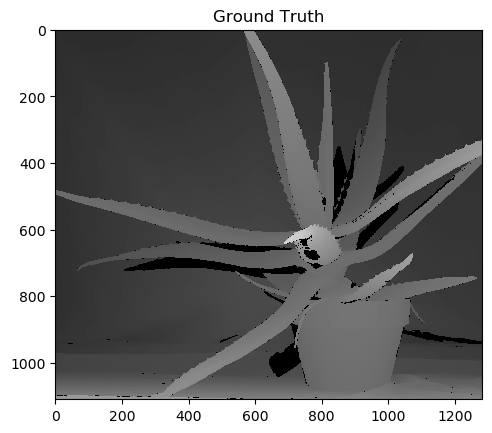

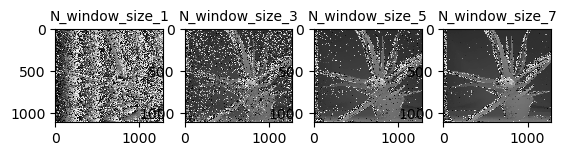

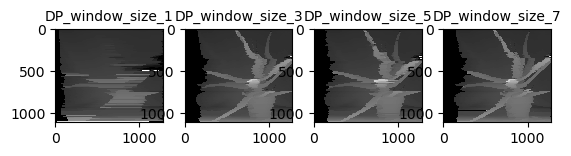

In [3]:
## Ground Truth
gt3=Image.open("../dataset/pair_3/disp1.png").convert("L")

## Naive
pair_3_Naive_1 = Image.open("../dataset/pair_3/results/window_size_1/naive_1_naive.png").convert("L")
pair_3_Naive_3 = Image.open('../dataset/pair_3/results/window_size_3/naive_3_naive.png').convert("L")
pair_3_Naive_5 = Image.open('../dataset/pair_3/results/window_size_5/naive_5_naive.png').convert("L")
pair_3_Naive_7 = Image.open('../dataset/pair_3/results/window_size_7/naive_7_naive.png').convert("L")

## Dynamic Programming
pair_3_DP_1 = Image.open('../dataset/pair_3/results/window_size_1/dp_1_100_dynamic.png').convert("L")
pair_3_DP_3 = Image.open('../dataset/pair_3/results/window_size_3/dp_3_100_dynamic.png').convert("L")
pair_3_DP_5 = Image.open('../dataset/pair_3/results/window_size_5/dp_5_500_dynamic.png').convert("L")
pair_3_DP_7 = Image.open('../dataset/pair_3/results/window_size_7/dp_7_500_dynamic.png').convert("L")

## Plot
plt.imshow(gt3,cmap='gray', vmin=0, vmax=255)
plt.title('Ground Truth')

f1 = plt.figure()
f1.add_subplot(1,4, 1)
plt.imshow(pair_3_Naive_1,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_1', fontsize=10)
f1.add_subplot(1,4, 2)
plt.imshow(pair_3_Naive_3,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_3', fontsize=10)
f1.add_subplot(1,4, 3)
plt.imshow(pair_3_Naive_5,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_5', fontsize=10)
f1.add_subplot(1,4, 4)
plt.imshow(pair_3_Naive_7,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_7', fontsize=10)

f2 = plt.figure()
f2.add_subplot(1,4, 1)
plt.imshow(pair_3_DP_1,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_1', fontsize=10)
f2.add_subplot(1,4, 2)
plt.imshow(pair_3_DP_3,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_3', fontsize=10)
f2.add_subplot(1,4, 3)
plt.imshow(pair_3_DP_5,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_5', fontsize=10)
f2.add_subplot(1,4, 4)
plt.imshow(pair_3_DP_7,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_7', fontsize=10)
plt.show()

Forth Pair:

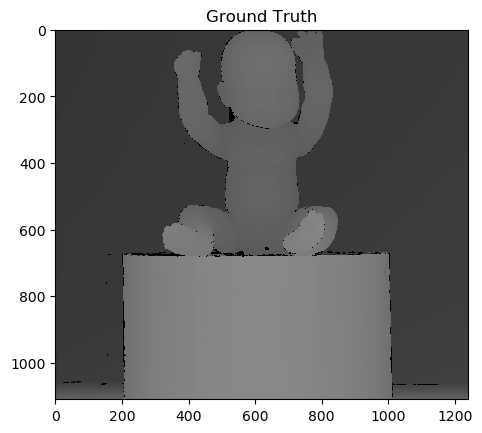

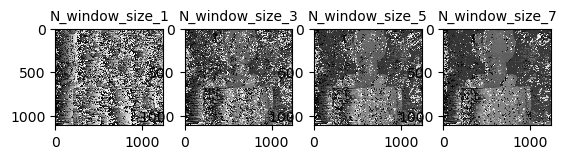

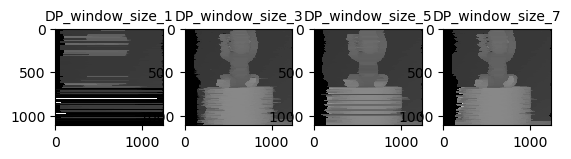

In [4]:
## Ground Truth
gt4=Image.open("../dataset/pair_4/disp1.png").convert("L")

## Naive
pair_4_Naive_1 = Image.open("../dataset/pair_4/results/window_size_1/naive_1_naive.png").convert("L")
pair_4_Naive_3 = Image.open('../dataset/pair_4/results/window_size_3/naive_3_naive.png').convert("L")
pair_4_Naive_5 = Image.open('../dataset/pair_4/results/window_size_5/naive_5_naive.png').convert("L")
pair_4_Naive_7 = Image.open('../dataset/pair_4/results/window_size_7/naive_7_naive.png').convert("L")

## Dynamic Programming
pair_4_DP_1 = Image.open('../dataset/pair_4/results/window_size_1/dp_1_100_dynamic.png').convert("L")
pair_4_DP_3 = Image.open('../dataset/pair_4/results/window_size_3/dp_3_100_dynamic.png').convert("L")
pair_4_DP_5 = Image.open('../dataset/pair_4/results/window_size_5/dp_5_500_dynamic.png').convert("L")
pair_4_DP_7 = Image.open('../dataset/pair_4/results/window_size_7/dp_7_500_dynamic.png').convert("L")

## Plot
plt.imshow(gt4,cmap='gray', vmin=0, vmax=255)
plt.title('Ground Truth')

f1 = plt.figure()
f1.add_subplot(1,4, 1)
plt.imshow(pair_4_Naive_1,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_1', fontsize=10)
f1.add_subplot(1,4, 2)
plt.imshow(pair_4_Naive_3,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_3', fontsize=10)
f1.add_subplot(1,4, 3)
plt.imshow(pair_4_Naive_5,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_5', fontsize=10)
f1.add_subplot(1,4, 4)
plt.imshow(pair_4_Naive_7,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_7', fontsize=10)

f2 = plt.figure()
f2.add_subplot(1,4, 1)
plt.imshow(pair_4_DP_1,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_1', fontsize=10)
f2.add_subplot(1,4, 2)
plt.imshow(pair_4_DP_3,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_3', fontsize=10)
f2.add_subplot(1,4, 3)
plt.imshow(pair_4_DP_5,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_5', fontsize=10)
f2.add_subplot(1,4, 4)
plt.imshow(pair_4_DP_7,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_7', fontsize=10)
plt.show()

Fifth Pair:

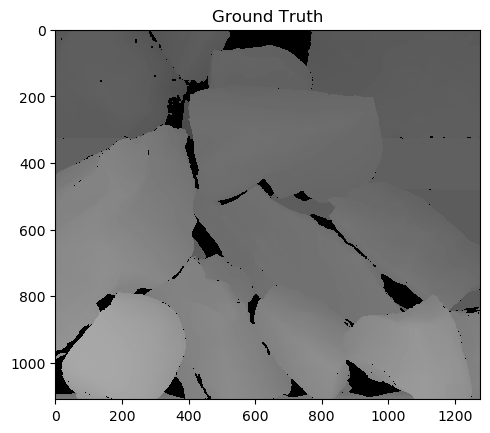

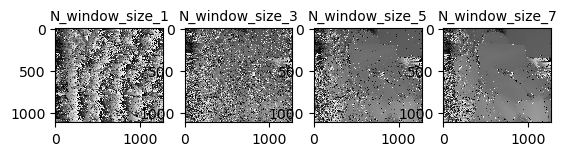

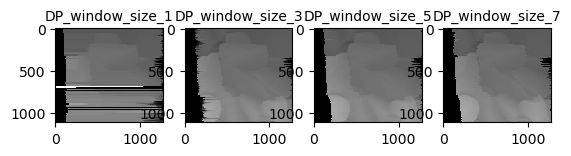

In [112]:
## Ground Truth
gt5=Image.open("../dataset/pair_5/disp1.png").convert("L")

## Naive
pair_5_Naive_1 = Image.open("../dataset/pair_5/results/window_size_1/naive_1_naive.png").convert("L")
pair_5_Naive_3 = Image.open('../dataset/pair_5/results/window_size_3/naive_3_naive.png').convert("L")
pair_5_Naive_5 = Image.open('../dataset/pair_5/results/window_size_5/naive_5_naive.png').convert("L")
pair_5_Naive_7 = Image.open('../dataset/pair_5/results/window_size_7/naive_7_naive.png').convert("L")

## Dynamic Programming
pair_5_DP_1 = Image.open('../dataset/pair_5/results/window_size_1/dp_1_100_dynamic.png').convert("L")
pair_5_DP_3 = Image.open('../dataset/pair_5/results/window_size_3/dp_3_100_dynamic.png').convert("L")
pair_5_DP_5 = Image.open('../dataset/pair_5/results/window_size_5/dp_5_500_dynamic.png').convert("L")
pair_5_DP_7 = Image.open('../dataset/pair_5/results/window_size_7/dp_7_500_dynamic.png').convert("L")

## Plot
plt.imshow(gt5,cmap='gray', vmin=0, vmax=255)
plt.title('Ground Truth')

f1 = plt.figure()
f1.add_subplot(1,4, 1)
plt.imshow(pair_5_Naive_1,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_1', fontsize=10)
f1.add_subplot(1,4, 2)
plt.imshow(pair_5_Naive_3,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_3', fontsize=10)
f1.add_subplot(1,4, 3)
plt.imshow(pair_5_Naive_5,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_5', fontsize=10)
f1.add_subplot(1,4, 4)
plt.imshow(pair_5_Naive_7,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_7', fontsize=10)

f2 = plt.figure()
f2.add_subplot(1,4, 1)
plt.imshow(pair_5_DP_1,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_1', fontsize=10)
f2.add_subplot(1,4, 2)
plt.imshow(pair_5_DP_3,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_3', fontsize=10)
f2.add_subplot(1,4, 3)
plt.imshow(pair_5_DP_5,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_5', fontsize=10)
f2.add_subplot(1,4, 4)
plt.imshow(pair_5_DP_7,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_7', fontsize=10)
plt.show()

Sixth Pair:

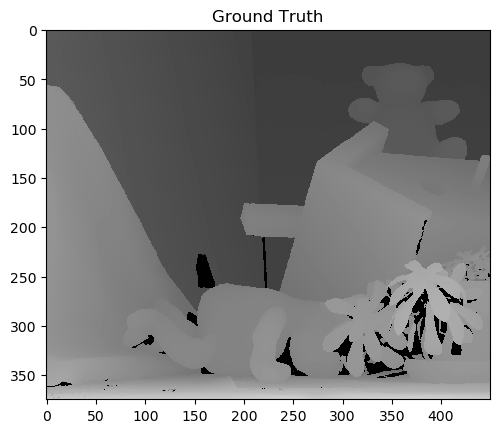

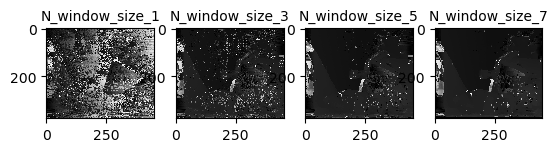

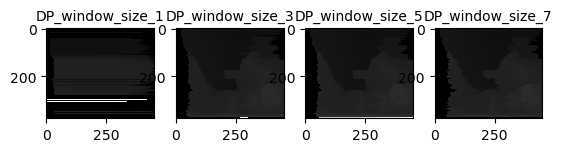

In [5]:
## Ground Truth
gt6=Image.open("../dataset/pair_6/disp1.png").convert("L")

## Naive
pair_6_Naive_1 = Image.open("../dataset/pair_6/results/window_size_1/naive_1_naive.png").convert("L")
pair_6_Naive_3 = Image.open('../dataset/pair_6/results/window_size_3/naive_3_naive.png').convert("L")
pair_6_Naive_5 = Image.open('../dataset/pair_6/results/window_size_5/naive_5_naive.png').convert("L")
pair_6_Naive_7 = Image.open('../dataset/pair_6/results/window_size_7/naive_7_naive.png').convert("L")

## Dynamic Programming
pair_6_DP_1 = Image.open('../dataset/pair_6/results/window_size_1/dp_1_250_dynamic.png').convert("L")
pair_6_DP_3 = Image.open('../dataset/pair_6/results/window_size_3/dp_3_250_dynamic.png').convert("L")
pair_6_DP_5 = Image.open('../dataset/pair_6/results/window_size_5/dp_5_500_dynamic.png').convert("L")
pair_6_DP_7 = Image.open('../dataset/pair_6/results/window_size_7/dp_7_500_dynamic.png').convert("L")

## Plot
plt.imshow(gt6,cmap='gray', vmin=0, vmax=255)
plt.title('Ground Truth')

f1 = plt.figure()
f1.add_subplot(1,4, 1)
plt.imshow(pair_6_Naive_1,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_1', fontsize=10)
f1.add_subplot(1,4, 2)
plt.imshow(pair_6_Naive_3,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_3', fontsize=10)
f1.add_subplot(1,4, 3)
plt.imshow(pair_6_Naive_5,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_5', fontsize=10)
f1.add_subplot(1,4, 4)
plt.imshow(pair_6_Naive_7,cmap='gray', vmin=0, vmax=255)
plt.title('N_window_size_7', fontsize=10)

f2 = plt.figure()
f2.add_subplot(1,4, 1)
plt.imshow(pair_6_DP_1,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_1', fontsize=10)
f2.add_subplot(1,4, 2)
plt.imshow(pair_6_DP_3,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_3', fontsize=10)
f2.add_subplot(1,4, 3)
plt.imshow(pair_6_DP_5,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_5', fontsize=10)
f2.add_subplot(1,4, 4)
plt.imshow(pair_6_DP_7,cmap='gray', vmin=0, vmax=255)
plt.title('DP_window_size_7', fontsize=10)
plt.show()

In [6]:
def SSD(image,gt):
    img=Image.open(image)
    ground_truth=Image.open(gt)
    SSD=np.sum((np.array(img) - np.array(ground_truth))**2)
    return SSD


In [7]:
def NCC(image,gt):
    method = 'cv2.TM_CCORR_NORMED'
    img=Image.open(image)
    ground_truth=Image.open(gt)
    NCC = cv2.matchTemplate(np.array(img), np.array(ground_truth), eval(method))
    return NCC

In [8]:
def SSIM(image,gt):
    img=Image.open(image)
    ground_truth=Image.open(gt)
    SSIM = compare_ssim(img, ground_truth,GPU=False)
    return SSIM

In [10]:
def plot_Metrics(x,naive1,dp1,naive2,dp2,naive3,dp3,naive4,dp4,naive5,dp5,naive6,dp6,metrics_name,title):
    plt.plot(x,naive1,label=[ i for i, a in locals().items() if a ==naive1][0],linestyle='dashed')
    plt.plot(x,dp1,label=[ i for i, a in locals().items() if a ==dp1][0])
    plt.plot(x,naive2,label=[ i for i, a in locals().items() if a ==naive2][0],linestyle='dashed')
    plt.plot(x,dp2,label=[ i for i, a in locals().items() if a ==dp2][0])
    plt.plot(x,naive3,label=[ i for i, a in locals().items() if a ==naive3][0],linestyle='dashed')
    plt.plot(x,dp3,label=[ i for i, a in locals().items() if a ==dp3][0])
    plt.plot(x,naive4,label=[ i for i, a in locals().items() if a ==naive4][0],linestyle='dashed')
    plt.plot(x,dp4,label=[ i for i, a in locals().items() if a ==dp4][0])
    plt.plot(x,naive5,label=[ i for i, a in locals().items() if a ==naive5][0],linestyle='dashed')
    plt.plot(x,dp5,label=[ i for i, a in locals().items() if a ==dp5][0])
    plt.plot(x,naive6,label=[ i for i, a in locals().items() if a ==naive6][0],linestyle='dashed')
    plt.plot(x,dp6,label=[ i for i, a in locals().items() if a ==dp6][0])
    plt.xlabel("Window_size")
    plt.ylabel(metrics_name)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

Metrics Comparison

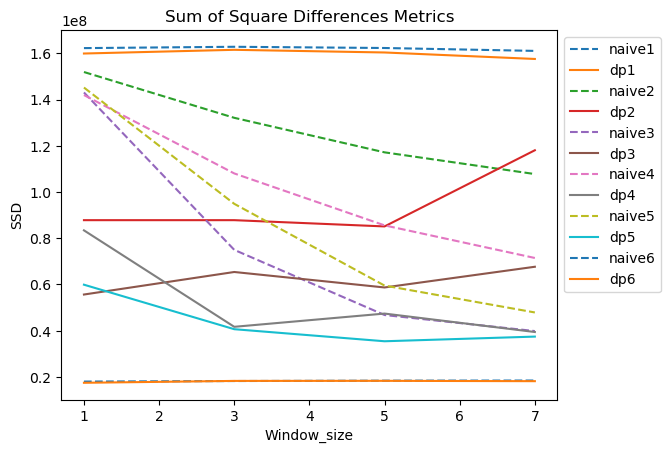

In [11]:
## Naive Approach
## Pair (1)
SSD_naive_1_1=SSD("../dataset/pair_1/results/window_size_1/naive_1_naive.png","../dataset/pair_1/disp1.png")
SSD_naive_1_3=SSD("../dataset/pair_1/results/window_size_3/naive_3_naive.png","../dataset/pair_1/disp1.png")
SSD_naive_1_5=SSD("../dataset/pair_1/results/window_size_5/naive_5_naive.png","../dataset/pair_1/disp1.png")
SSD_naive_1_7=SSD("../dataset/pair_1/results/window_size_7/naive_7_naive.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSD_naive_2_1=SSD("../dataset/pair_2/results/window_size_1/naive_1_naive.png","../dataset/pair_2/disp1.png")
SSD_naive_2_3=SSD("../dataset/pair_2/results/window_size_3/naive_3_naive.png","../dataset/pair_2/disp1.png")
SSD_naive_2_5=SSD("../dataset/pair_2/results/window_size_5/naive_5_naive.png","../dataset/pair_2/disp1.png")
SSD_naive_2_7=SSD('../dataset/pair_2/results/window_size_7/naive_7_naive.png',"../dataset/pair_2/disp1.png")

## Pair (3)
SSD_naive_3_1=SSD("../dataset/pair_3/results/window_size_1/naive_1_naive.png","../dataset/pair_3/disp1.png")
SSD_naive_3_3=SSD("../dataset/pair_3/results/window_size_3/naive_3_naive.png","../dataset/pair_3/disp1.png")
SSD_naive_3_5=SSD("../dataset/pair_3/results/window_size_5/naive_5_naive.png","../dataset/pair_3/disp1.png")
SSD_naive_3_7=SSD('../dataset/pair_3/results/window_size_7/naive_7_naive.png',"../dataset/pair_3/disp1.png")

## Pair (4)
SSD_naive_4_1=SSD("../dataset/pair_4/results/window_size_1/naive_1_naive.png","../dataset/pair_4/disp1.png")
SSD_naive_4_3=SSD("../dataset/pair_4/results/window_size_3/naive_3_naive.png","../dataset/pair_4/disp1.png")
SSD_naive_4_5=SSD("../dataset/pair_4/results/window_size_5/naive_5_naive.png","../dataset/pair_4/disp1.png")
SSD_naive_4_7=SSD('../dataset/pair_4/results/window_size_7/naive_7_naive.png',"../dataset/pair_4/disp1.png")

## Pair (5)
SSD_naive_5_1=SSD("../dataset/pair_5/results/window_size_1/naive_1_naive.png","../dataset/pair_5/disp1.png")
SSD_naive_5_3=SSD("../dataset/pair_5/results/window_size_3/naive_3_naive.png","../dataset/pair_5/disp1.png")
SSD_naive_5_5=SSD("../dataset/pair_5/results/window_size_5/naive_5_naive.png","../dataset/pair_5/disp1.png")
SSD_naive_5_7=SSD('../dataset/pair_5/results/window_size_7/naive_7_naive.png',"../dataset/pair_5/disp1.png")

## Pair (6)
SSD_naive_6_1=SSD("../dataset/pair_6/results/window_size_1/naive_1_naive.png","../dataset/pair_6/disp1.png")
SSD_naive_6_3=SSD("../dataset/pair_6/results/window_size_3/naive_3_naive.png","../dataset/pair_6/disp1.png")
SSD_naive_6_5=SSD("../dataset/pair_6/results/window_size_5/naive_5_naive.png","../dataset/pair_6/disp1.png")
SSD_naive_6_7=SSD('../dataset/pair_6/results/window_size_7/naive_7_naive.png',"../dataset/pair_6/disp1.png")

## Dynamic Programming 
## Pair (1)
SSD_dp_1_1=SSD("../dataset/pair_1/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_1/disp1.png")
SSD_dp_1_3=SSD("../dataset/pair_1/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_1/disp1.png")
SSD_dp_1_5=SSD("../dataset/pair_1/results/window_size_5/dp_5_100_dynamic.png","../dataset/pair_1/disp1.png")
SSD_dp_1_7=SSD("../dataset/pair_1/results/window_size_7/dp_7_100_dynamic.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSD_dp_2_3=SSD("../dataset/pair_2/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_2/disp1.png")
SSD_dp_2_5=SSD("../dataset/pair_2/results/window_size_5/dp_5_100_dynamic.png","../dataset/pair_2/disp1.png")
SSD_dp_2_7=SSD("../dataset/pair_2/results/window_size_7/dp_7_100_dynamic.png","../dataset/pair_2/disp1.png")

## Pair (3)
SSD_dp_3_1=SSD("../dataset/pair_3/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_3/disp1.png")
SSD_dp_3_3=SSD("../dataset/pair_3/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_3/disp1.png")
SSD_dp_3_5=SSD("../dataset/pair_3/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_3/disp1.png")
SSD_dp_3_7=SSD("../dataset/pair_3/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSD_dp_4_1=SSD("../dataset/pair_4/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_4/disp1.png")
SSD_dp_4_3=SSD("../dataset/pair_4/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_4/disp1.png")
SSD_dp_4_5=SSD("../dataset/pair_4/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_4/disp1.png")
SSD_dp_4_7=SSD("../dataset/pair_4/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSD_dp_5_1=SSD("../dataset/pair_5/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_5/disp1.png")
SSD_dp_5_3=SSD("../dataset/pair_5/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_5/disp1.png")
SSD_dp_5_5=SSD("../dataset/pair_5/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_5/disp1.png")
SSD_dp_5_7=SSD("../dataset/pair_5/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSD_dp_6_1=SSD("../dataset/pair_6/results/window_size_1/dp_1_250_dynamic.png","../dataset/pair_6/disp1.png")
SSD_dp_6_3=SSD("../dataset/pair_6/results/window_size_3/dp_3_250_dynamic.png","../dataset/pair_6/disp1.png")
SSD_dp_6_5=SSD("../dataset/pair_6/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_6/disp1.png")
SSD_dp_6_7=SSD("../dataset/pair_6/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_6/disp1.png")

# Plotting SSD 
x=[1,3,5,7]
Naive_Pair1_SSD=[SSD_naive_1_1,SSD_naive_1_3,SSD_naive_1_5,SSD_naive_1_7]
DP_Pair1_SSD=[SSD_dp_1_1,SSD_dp_1_3,SSD_dp_1_5,SSD_dp_1_7]

Naive_Pair2_SSD=[SSD_naive_2_1,SSD_naive_2_3,SSD_naive_2_5,SSD_naive_2_7]
DP_Pair2_SSD=[SSD_dp_2_3,SSD_dp_2_5,SSD_dp_2_7]
DP_Pair2_SSD.insert(0,np.interp(1,x[1:], DP_Pair2_SSD))

Naive_Pair3_SSD=[SSD_naive_3_1,SSD_naive_3_3,SSD_naive_3_5,SSD_naive_3_7]
DP_Pair3_SSD=[SSD_dp_3_1,SSD_dp_3_3,SSD_dp_3_5,SSD_dp_3_7]

Naive_Pair4_SSD=[SSD_naive_4_1,SSD_naive_4_3,SSD_naive_4_5,SSD_naive_4_7]
DP_Pair4_SSD=[SSD_dp_4_1,SSD_dp_4_3,SSD_dp_4_5,SSD_dp_4_7]

Naive_Pair5_SSD=[SSD_naive_5_1,SSD_naive_5_3,SSD_naive_5_5,SSD_naive_5_7]
DP_Pair5_SSD=[SSD_dp_5_1,SSD_dp_5_3,SSD_dp_5_5,SSD_dp_5_7]

Naive_Pair6_SSD=[SSD_naive_6_1,SSD_naive_6_3,SSD_naive_6_5,SSD_naive_6_7]
DP_Pair6_SSD=[SSD_dp_6_1,SSD_dp_6_3,SSD_dp_6_5,SSD_dp_6_7]

plot_Metrics(x,Naive_Pair1_SSD,DP_Pair1_SSD,Naive_Pair2_SSD,DP_Pair2_SSD,Naive_Pair3_SSD,DP_Pair3_SSD
            ,Naive_Pair4_SSD,DP_Pair4_SSD,Naive_Pair5_SSD,DP_Pair5_SSD
            ,Naive_Pair6_SSD,DP_Pair6_SSD,"SSD","Sum of Square Differences Metrics")


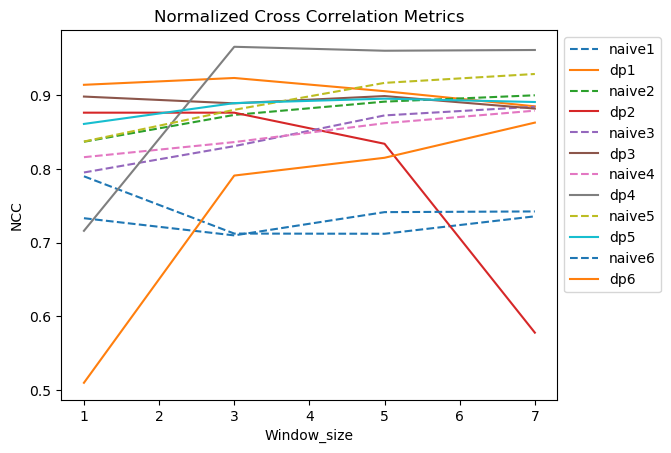

In [12]:
## Naive Approach
## Pair (1)
NCC_naive_1_1=NCC("../dataset/pair_1/results/window_size_1/naive_1_naive.png","../dataset/pair_1/disp1.png")
NCC_naive_1_3=NCC("../dataset/pair_1/results/window_size_3/naive_3_naive.png","../dataset/pair_1/disp1.png")
NCC_naive_1_5=NCC("../dataset/pair_1/results/window_size_5/naive_5_naive.png","../dataset/pair_1/disp1.png")
NCC_naive_1_7=NCC("../dataset/pair_1/results/window_size_7/naive_7_naive.png","../dataset/pair_1/disp1.png")

## Pair (2)
NCC_naive_2_1=NCC("../dataset/pair_2/results/window_size_1/naive_1_naive.png","../dataset/pair_2/disp1.png")
NCC_naive_2_3=NCC("../dataset/pair_2/results/window_size_3/naive_3_naive.png","../dataset/pair_2/disp1.png")
NCC_naive_2_5=NCC("../dataset/pair_2/results/window_size_5/naive_5_naive.png","../dataset/pair_2/disp1.png")
NCC_naive_2_7=NCC('../dataset/pair_2/results/window_size_7/naive_7_naive.png',"../dataset/pair_2/disp1.png")

## Pair (3)
NCC_naive_3_1=NCC("../dataset/pair_3/results/window_size_1/naive_1_naive.png","../dataset/pair_3/disp1.png")
NCC_naive_3_3=NCC("../dataset/pair_3/results/window_size_3/naive_3_naive.png","../dataset/pair_3/disp1.png")
NCC_naive_3_5=NCC("../dataset/pair_3/results/window_size_5/naive_5_naive.png","../dataset/pair_3/disp1.png")
NCC_naive_3_7=NCC('../dataset/pair_3/results/window_size_7/naive_7_naive.png',"../dataset/pair_3/disp1.png")

## Pair (4)
NCC_naive_4_1=NCC("../dataset/pair_4/results/window_size_1/naive_1_naive.png","../dataset/pair_4/disp1.png")
NCC_naive_4_3=NCC("../dataset/pair_4/results/window_size_3/naive_3_naive.png","../dataset/pair_4/disp1.png")
NCC_naive_4_5=NCC("../dataset/pair_4/results/window_size_5/naive_5_naive.png","../dataset/pair_4/disp1.png")
NCC_naive_4_7=NCC('../dataset/pair_4/results/window_size_7/naive_7_naive.png',"../dataset/pair_4/disp1.png")

## Pair (5)
NCC_naive_5_1=NCC("../dataset/pair_5/results/window_size_1/naive_1_naive.png","../dataset/pair_5/disp1.png")
NCC_naive_5_3=NCC("../dataset/pair_5/results/window_size_3/naive_3_naive.png","../dataset/pair_5/disp1.png")
NCC_naive_5_5=NCC("../dataset/pair_5/results/window_size_5/naive_5_naive.png","../dataset/pair_5/disp1.png")
NCC_naive_5_7=NCC('../dataset/pair_5/results/window_size_7/naive_7_naive.png',"../dataset/pair_5/disp1.png")

## Pair (6)
NCC_naive_6_1=NCC("../dataset/pair_6/results/window_size_1/naive_1_naive.png","../dataset/pair_6/disp1.png")
NCC_naive_6_3=NCC("../dataset/pair_6/results/window_size_3/naive_3_naive.png","../dataset/pair_6/disp1.png")
NCC_naive_6_5=NCC("../dataset/pair_6/results/window_size_5/naive_5_naive.png","../dataset/pair_6/disp1.png")
NCC_naive_6_7=NCC('../dataset/pair_6/results/window_size_7/naive_7_naive.png',"../dataset/pair_6/disp1.png")

## Dynamic Programming 
## Pair (1)
NCC_dp_1_1=NCC("../dataset/pair_1/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_1/disp1.png")
NCC_dp_1_3=NCC("../dataset/pair_1/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_1/disp1.png")
NCC_dp_1_5=NCC("../dataset/pair_1/results/window_size_5/dp_5_100_dynamic.png","../dataset/pair_1/disp1.png")
NCC_dp_1_7=NCC("../dataset/pair_1/results/window_size_7/dp_7_100_dynamic.png","../dataset/pair_1/disp1.png")

## Pair (2)
NCC_dp_2_3=NCC("../dataset/pair_2/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_2/disp1.png")
NCC_dp_2_5=NCC("../dataset/pair_2/results/window_size_5/dp_5_100_dynamic.png","../dataset/pair_2/disp1.png")
NCC_dp_2_7=NCC("../dataset/pair_2/results/window_size_7/dp_7_100_dynamic.png","../dataset/pair_2/disp1.png")

## Pair (3)
NCC_dp_3_1=NCC("../dataset/pair_3/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_3/disp1.png")
NCC_dp_3_3=NCC("../dataset/pair_3/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_3/disp1.png")
NCC_dp_3_5=NCC("../dataset/pair_3/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_3/disp1.png")
NCC_dp_3_7=NCC("../dataset/pair_3/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_3/disp1.png")

## Pair (4)
NCC_dp_4_1=NCC("../dataset/pair_4/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_4/disp1.png")
NCC_dp_4_3=NCC("../dataset/pair_4/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_4/disp1.png")
NCC_dp_4_5=NCC("../dataset/pair_4/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_4/disp1.png")
NCC_dp_4_7=NCC("../dataset/pair_4/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_4/disp1.png")

## Pair (5)
NCC_dp_5_1=NCC("../dataset/pair_5/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_5/disp1.png")
NCC_dp_5_3=NCC("../dataset/pair_5/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_5/disp1.png")
NCC_dp_5_5=NCC("../dataset/pair_5/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_5/disp1.png")
NCC_dp_5_7=NCC("../dataset/pair_5/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_5/disp1.png")

## Pair (6)
NCC_dp_6_1=NCC("../dataset/pair_6/results/window_size_1/dp_1_250_dynamic.png","../dataset/pair_6/disp1.png")
NCC_dp_6_3=NCC("../dataset/pair_6/results/window_size_3/dp_3_250_dynamic.png","../dataset/pair_6/disp1.png")
NCC_dp_6_5=NCC("../dataset/pair_6/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_6/disp1.png")
NCC_dp_6_7=NCC("../dataset/pair_6/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_6/disp1.png")

# Plotting NCC 
Naive_Pair1_NCC=[NCC_naive_1_1[0][0],NCC_naive_1_3[0][0],NCC_naive_1_5[0][0],NCC_naive_1_7[0][0]]
DP_Pair1_NCC=[NCC_dp_1_1[0][0],NCC_dp_1_3[0][0],NCC_dp_1_5[0][0],NCC_dp_1_7[0][0]]
Naive_Pair2_NCC=[NCC_naive_2_1[0][0],NCC_naive_2_3[0][0],NCC_naive_2_5[0][0],NCC_naive_2_7[0][0]]
DP_Pair2_NCC=[NCC_dp_2_3[0][0],NCC_dp_2_5[0][0],NCC_dp_2_7[0][0]]
DP_Pair2_NCC.insert(0,np.interp(1,x[1:], DP_Pair2_NCC))
Naive_Pair3_NCC=[NCC_naive_3_1[0][0],NCC_naive_3_3[0][0],NCC_naive_3_5[0][0],NCC_naive_3_7[0][0]]
DP_Pair3_NCC=[NCC_dp_3_1[0][0],NCC_dp_3_3[0][0],NCC_dp_3_5[0][0],NCC_dp_3_7[0][0]]
Naive_Pair4_NCC=[NCC_naive_4_1[0][0],NCC_naive_4_3[0][0],NCC_naive_4_5[0][0],NCC_naive_4_7[0][0]]
DP_Pair4_NCC=[NCC_dp_4_1[0][0],NCC_dp_4_3[0][0],NCC_dp_4_5[0][0],NCC_dp_4_7[0][0]]
Naive_Pair5_NCC=[NCC_naive_5_1[0][0],NCC_naive_5_3[0][0],NCC_naive_5_5[0][0],NCC_naive_5_7[0][0]]
DP_Pair5_NCC=[NCC_dp_5_1[0][0],NCC_dp_5_3[0][0],NCC_dp_5_5[0][0],NCC_dp_5_7[0][0]]
Naive_Pair6_NCC=[NCC_naive_6_1[0][0],NCC_naive_6_3[0][0],NCC_naive_6_5[0][0],NCC_naive_6_7[0][0]]
DP_Pair6_NCC=[NCC_dp_6_1[0][0],NCC_dp_6_3[0][0],NCC_dp_6_5[0][0],NCC_dp_6_7[0][0]]

plot_Metrics(x,Naive_Pair1_NCC,DP_Pair1_NCC,Naive_Pair2_NCC,DP_Pair2_NCC,Naive_Pair3_NCC,DP_Pair3_NCC
            ,Naive_Pair4_NCC,DP_Pair4_NCC,Naive_Pair5_NCC,DP_Pair5_NCC
            ,Naive_Pair6_NCC,DP_Pair6_NCC,"NCC","Normalized Cross Correlation Metrics")

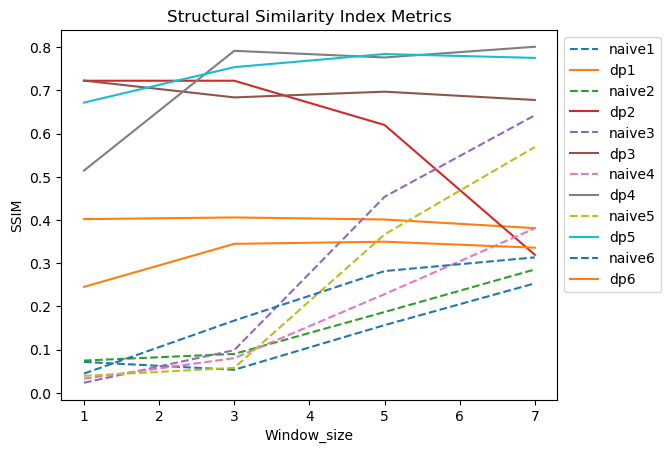

In [13]:
## Naive Approach
## Pair (1)
SSIM_naive_1_1=SSIM("../dataset/pair_1/results/window_size_1/naive_1_naive.png","../dataset/pair_1/disp1.png")
SSIM_naive_1_3=SSIM("../dataset/pair_1/results/window_size_3/naive_3_naive.png","../dataset/pair_1/disp1.png")
SSIM_naive_1_5=SSIM("../dataset/pair_1/results/window_size_5/naive_5_naive.png","../dataset/pair_1/disp1.png")
SSIM_naive_1_7=SSIM("../dataset/pair_1/results/window_size_7/naive_7_naive.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSIM_naive_2_1=SSIM("../dataset/pair_2/results/window_size_1/naive_1_naive.png","../dataset/pair_2/disp1.png")
SSIM_naive_2_3=SSIM("../dataset/pair_2/results/window_size_3/naive_3_naive.png","../dataset/pair_2/disp1.png")
SSIM_naive_2_5=SSIM("../dataset/pair_2/results/window_size_5/naive_5_naive.png","../dataset/pair_2/disp1.png")
SSIM_naive_2_7=SSIM('../dataset/pair_2/results/window_size_7/naive_7_naive.png',"../dataset/pair_2/disp1.png")

## Pair (3)
SSIM_naive_3_1=SSIM("../dataset/pair_3/results/window_size_1/naive_1_naive.png","../dataset/pair_3/disp1.png")
SSIM_naive_3_3=SSIM("../dataset/pair_3/results/window_size_3/naive_3_naive.png","../dataset/pair_3/disp1.png")
SSIM_naive_3_5=SSIM("../dataset/pair_3/results/window_size_5/naive_5_naive.png","../dataset/pair_3/disp1.png")
SSIM_naive_3_7=SSIM("../dataset/pair_3/results/window_size_7/naive_7_naive.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSIM_naive_4_1=SSIM("../dataset/pair_4/results/window_size_1/naive_1_naive.png","../dataset/pair_4/disp1.png")
SSIM_naive_4_3=SSIM("../dataset/pair_4/results/window_size_3/naive_3_naive.png","../dataset/pair_4/disp1.png")
SSIM_naive_4_5=SSIM("../dataset/pair_4/results/window_size_5/naive_5_naive.png","../dataset/pair_4/disp1.png")
SSIM_naive_4_7=SSIM("../dataset/pair_4/results/window_size_7/naive_7_naive.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSIM_naive_5_1=SSIM("../dataset/pair_5/results/window_size_1/naive_1_naive.png","../dataset/pair_5/disp1.png")
SSIM_naive_5_3=SSIM("../dataset/pair_5/results/window_size_3/naive_3_naive.png","../dataset/pair_5/disp1.png")
SSIM_naive_5_5=SSIM("../dataset/pair_5/results/window_size_5/naive_5_naive.png","../dataset/pair_5/disp1.png")
SSIM_naive_5_7=SSIM("../dataset/pair_5/results/window_size_7/naive_7_naive.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSIM_naive_6_1=SSIM("../dataset/pair_6/results/window_size_1/naive_1_naive.png","../dataset/pair_6/disp1.png")
SSIM_naive_6_3=SSIM("../dataset/pair_6/results/window_size_3/naive_3_naive.png","../dataset/pair_6/disp1.png")
SSIM_naive_6_5=SSIM("../dataset/pair_6/results/window_size_5/naive_5_naive.png","../dataset/pair_6/disp1.png")
SSIM_naive_6_7=SSIM("../dataset/pair_6/results/window_size_7/naive_7_naive.png","../dataset/pair_6/disp1.png")

## Dynamic Programming 
## Pair (1)
SSIM_dp_1_1=SSIM("../dataset/pair_1/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_1/disp1.png")
SSIM_dp_1_3=SSIM("../dataset/pair_1/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_1/disp1.png")
SSIM_dp_1_5=SSIM("../dataset/pair_1/results/window_size_5/dp_5_100_dynamic.png","../dataset/pair_1/disp1.png")
SSIM_dp_1_7=SSIM("../dataset/pair_1/results/window_size_7/dp_7_100_dynamic.png","../dataset/pair_1/disp1.png")

## Pair (2)
SSIM_dp_2_3=SSIM("../dataset/pair_2/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_2/disp1.png")
SSIM_dp_2_5=SSIM("../dataset/pair_2/results/window_size_5/dp_5_100_dynamic.png","../dataset/pair_2/disp1.png")
SSIM_dp_2_7=SSIM("../dataset/pair_2/results/window_size_7/dp_7_100_dynamic.png","../dataset/pair_2/disp1.png")

## Pair (3)
SSIM_dp_3_1=SSIM("../dataset/pair_3/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_3/disp1.png")
SSIM_dp_3_3=SSIM("../dataset/pair_3/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_3/disp1.png")
SSIM_dp_3_5=SSIM("../dataset/pair_3/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_3/disp1.png")
SSIM_dp_3_7=SSIM("../dataset/pair_3/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_3/disp1.png")

## Pair (4)
SSIM_dp_4_1=SSIM("../dataset/pair_4/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_4/disp1.png")
SSIM_dp_4_3=SSIM("../dataset/pair_4/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_4/disp1.png")
SSIM_dp_4_5=SSIM("../dataset/pair_4/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_4/disp1.png")
SSIM_dp_4_7=SSIM("../dataset/pair_4/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_4/disp1.png")

## Pair (5)
SSIM_dp_5_1=SSIM("../dataset/pair_5/results/window_size_1/dp_1_100_dynamic.png","../dataset/pair_5/disp1.png")
SSIM_dp_5_3=SSIM("../dataset/pair_5/results/window_size_3/dp_3_100_dynamic.png","../dataset/pair_5/disp1.png")
SSIM_dp_5_5=SSIM("../dataset/pair_5/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_5/disp1.png")
SSIM_dp_5_7=SSIM("../dataset/pair_5/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_5/disp1.png")

## Pair (6)
SSIM_dp_6_1=SSIM("../dataset/pair_6/results/window_size_1/dp_1_250_dynamic.png","../dataset/pair_6/disp1.png")
SSIM_dp_6_3=SSIM("../dataset/pair_6/results/window_size_3/dp_3_250_dynamic.png","../dataset/pair_6/disp1.png")
SSIM_dp_6_5=SSIM("../dataset/pair_6/results/window_size_5/dp_5_500_dynamic.png","../dataset/pair_6/disp1.png")
SSIM_dp_6_7=SSIM("../dataset/pair_6/results/window_size_7/dp_7_500_dynamic.png","../dataset/pair_6/disp1.png")

# Plotting SSIM
Naive_Pair1_SSIM=[SSIM_naive_1_1,SSIM_naive_1_3,SSIM_naive_1_5,SSIM_naive_1_7]
DP_Pair1_SSIM=[SSIM_dp_1_1,SSIM_dp_1_3,SSIM_dp_1_5,SSIM_dp_1_7]
Naive_Pair2_SSIM=[SSIM_naive_2_1,SSIM_naive_2_3,SSIM_naive_2_5,SSIM_naive_2_7]
DP_Pair2_SSIM=[SSIM_dp_2_3,SSIM_dp_2_5,SSIM_dp_2_7]
DP_Pair2_SSIM.insert(0,np.interp(1,x[1:], DP_Pair2_SSIM))
Naive_Pair3_SSIM=[SSIM_naive_3_1,SSIM_naive_3_3,SSIM_naive_3_5,SSIM_naive_3_7]
DP_Pair3_SSIM=[SSIM_dp_3_1,SSIM_dp_3_3,SSIM_dp_3_5,SSIM_dp_3_7]
Naive_Pair4_SSIM=[SSIM_naive_4_1,SSIM_naive_4_3,SSIM_naive_4_5,SSIM_naive_4_7]
DP_Pair4_SSIM=[SSIM_dp_4_1,SSIM_dp_4_3,SSIM_dp_4_5,SSIM_dp_4_7]
Naive_Pair5_SSIM=[SSIM_naive_5_1,SSIM_naive_5_3,SSIM_naive_5_5,SSIM_naive_5_7]
DP_Pair5_SSIM=[SSIM_dp_5_1,SSIM_dp_5_3,SSIM_dp_5_5,SSIM_dp_5_7]
Naive_Pair6_SSIM=[SSIM_naive_6_1,SSIM_naive_6_3,SSIM_naive_6_5,SSIM_naive_6_7]
DP_Pair6_SSIM=[SSIM_dp_6_1,SSIM_dp_6_3,SSIM_dp_6_5,SSIM_dp_6_7]

plot_Metrics(x,Naive_Pair1_SSIM,DP_Pair1_SSIM,Naive_Pair2_SSIM,DP_Pair2_SSIM,Naive_Pair3_SSIM,DP_Pair3_SSIM
            ,Naive_Pair4_SSIM,DP_Pair4_SSIM,Naive_Pair5_SSIM,DP_Pair5_SSIM
            ,Naive_Pair6_SSIM,DP_Pair6_SSIM,"SSIM","Structural Similarity Index Metrics")

Time Processing

In [15]:
def time_processing(file,index):
    f = open(file, "r")
    content = int(f.readlines()[index].split(" = ")[1])
    return content

def plot_time(x,naive1,dp1,naive2,dp2,naive3,dp3,naive4,dp4,naive5,dp5,naive6,dp6):
    plt.plot(x,naive1,label=[ i for i, a in locals().items() if a ==naive1][0],linestyle='dashed')
    plt.plot(x,dp1,label=[ i for i, a in locals().items() if a ==dp1][0])
    plt.plot(x,naive2,label=[ i for i, a in locals().items() if a ==naive2][0],linestyle='dashed')
    plt.plot(x,dp2,label=[ i for i, a in locals().items() if a ==dp2][0])
    plt.plot(x,naive3,label=[ i for i, a in locals().items() if a ==naive3][0],linestyle='dashed')
    plt.plot(x,dp3,label=[ i for i, a in locals().items() if a ==dp3][0])
    plt.plot(x,naive4,label=[ i for i, a in locals().items() if a ==naive4][0],linestyle='dashed')
    plt.plot(x,dp4,label=[ i for i, a in locals().items() if a ==dp4][0])
    plt.plot(x,naive5,label=[ i for i, a in locals().items() if a ==naive5][0],linestyle='dashed')
    plt.plot(x,dp5,label=[ i for i, a in locals().items() if a ==dp5][0])
    plt.plot(x,naive6,label=[ i for i, a in locals().items() if a ==naive6][0],linestyle='dashed')
    plt.plot(x,dp6,label=[ i for i, a in locals().items() if a ==dp6][0])
    plt.xlabel("Window_size")
    plt.ylabel("Time (sec)")
    plt.title("Time taken for each window size in different images")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

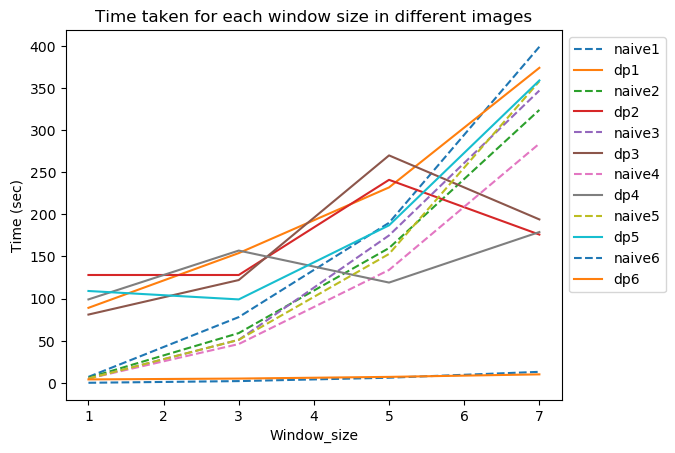

In [17]:
Naive1_1=time_processing("../dataset/pair_1/results/window_size_1/naive_1.txt",1)
dp1_1=time_processing("../dataset/pair_1/results/window_size_1/dp_1_100.txt",2)
Naive1_3=time_processing("../dataset/pair_1/results/window_size_3/naive_3.txt",1)
dp1_3=time_processing("../dataset/pair_1/results/window_size_3/dp_3_100.txt",2)
Naive1_5=time_processing("../dataset/pair_1/results/window_size_5/naive_5.txt",1)
dp1_5=time_processing("../dataset/pair_1/results/window_size_5/dp_5_100.txt",2)
Naive1_7=time_processing("../dataset/pair_1/results/window_size_7/naive_7.txt",1)
dp1_7=time_processing("../dataset/pair_1/results/window_size_7/dp_7_100.txt",2)

Naive1=[Naive1_1,Naive1_3,Naive1_5,Naive1_7]
dp1=[dp1_1,dp1_3,dp1_5,dp1_7]


Naive2_1=time_processing("../dataset/pair_2/results/window_size_1/naive_1.txt",1)
Naive2_3=time_processing("../dataset/pair_2/results/window_size_3/naive_3.txt",1)
dp2_3=time_processing("../dataset/pair_2/results/window_size_3/dp_3_100.txt",2)
Naive2_5=time_processing("../dataset/pair_2/results/window_size_5/naive_5.txt",1)
dp2_5=time_processing("../dataset/pair_2/results/window_size_5/dp_5_100.txt",2)
Naive2_7=time_processing("../dataset/pair_2/results/window_size_7/naive_7.txt",1)
dp2_7=time_processing("../dataset/pair_2/results/window_size_7/dp_7_100.txt",2)

Naive2=[Naive2_1,Naive2_3,Naive2_5,Naive2_7]
dp2=[dp2_3,dp2_5,dp2_7]
dp2.insert(0,np.interp(1,x[1:], dp2))

Naive3_1=time_processing("../dataset/pair_3/results/window_size_1/naive_1.txt",1)
dp3_1=time_processing("../dataset/pair_3/results/window_size_1/dp_1_100.txt",2)
Naive3_3=time_processing("../dataset/pair_3/results/window_size_3/naive_3.txt",1)
dp3_3=time_processing("../dataset/pair_3/results/window_size_3/dp_3_100.txt",2)
Naive3_5=time_processing("../dataset/pair_3/results/window_size_5/naive_5.txt",1)
dp3_5=time_processing("../dataset/pair_3/results/window_size_5/dp_5_500.txt",2)
Naive3_7=time_processing("../dataset/pair_3/results/window_size_7/naive_7.txt",1)
dp3_7=time_processing("../dataset/pair_3/results/window_size_7/dp_7_500.txt",2)

Naive3=[Naive3_1,Naive3_3,Naive3_5,Naive3_7]
dp3=[dp3_1,dp3_3,dp3_5,dp3_7]

Naive4_1=time_processing("../dataset/pair_4/results/window_size_1/naive_1.txt",1)
dp4_1=time_processing("../dataset/pair_4/results/window_size_1/dp_1_100.txt",2)
Naive4_3=time_processing("../dataset/pair_4/results/window_size_3/naive_3.txt",1)
dp4_3=time_processing("../dataset/pair_4/results/window_size_3/dp_3_100.txt",2)
Naive4_5=time_processing("../dataset/pair_4/results/window_size_5/naive_5.txt",1)
dp4_5=time_processing("../dataset/pair_4/results/window_size_5/dp_5_500.txt",2)
Naive4_7=time_processing("../dataset/pair_4/results/window_size_7/naive_7.txt",1)
dp4_7=time_processing("../dataset/pair_4/results/window_size_7/dp_7_500.txt",2)

Naive4=[Naive4_1,Naive4_3,Naive4_5,Naive4_7]
dp4=[dp4_1,dp4_3,dp4_5,dp4_7]


Naive5_1=time_processing("../dataset/pair_5/results/window_size_1/naive_1.txt",1)
dp5_1=time_processing("../dataset/pair_5/results/window_size_1/dp_1_100.txt",2)
Naive5_3=time_processing("../dataset/pair_5/results/window_size_3/naive_3.txt",1)
dp5_3=time_processing("../dataset/pair_5/results/window_size_3/dp_3_100.txt",2)
Naive5_5=time_processing("../dataset/pair_5/results/window_size_5/naive_5.txt",1)
dp5_5=time_processing("../dataset/pair_5/results/window_size_5/dp_5_500.txt",2)
Naive5_7=time_processing("../dataset/pair_5/results/window_size_7/naive_7.txt",1)
dp5_7=time_processing("../dataset/pair_5/results/window_size_7/dp_7_500.txt",2)

Naive5=[Naive5_1,Naive5_3,Naive5_5,Naive5_7]
dp5=[dp5_1,dp5_3,dp5_5,dp5_7]

Naive6_1=time_processing("../dataset/pair_6/results/window_size_1/naive_1.txt",1)
dp6_1=time_processing("../dataset/pair_6/results/window_size_1/dp_1_250.txt",2)
Naive6_3=time_processing("../dataset/pair_6/results/window_size_3/naive_3.txt",1)
dp6_3=time_processing("../dataset/pair_6/results/window_size_3/dp_3_250.txt",2)
Naive6_5=time_processing("../dataset/pair_6/results/window_size_5/naive_5.txt",1)
dp6_5=time_processing("../dataset/pair_6/results/window_size_5/dp_5_500.txt",2)
Naive6_7=time_processing("../dataset/pair_6/results/window_size_7/naive_7.txt",1)
dp6_7=time_processing("../dataset/pair_6/results/window_size_7/dp_7_500.txt",2)

Naive6=[Naive6_1,Naive6_3,Naive6_5,Naive6_7]
dp6=[dp6_1,dp6_3,dp6_5,dp6_7]

plot_time(x,Naive1,dp1,Naive2,dp2,Naive3,dp3,Naive4,dp4,Naive5,dp5,Naive6,dp6)

3D_Point Cloud Visualization

Text(0.5, 1.0, 'point_cloud_pair_4_3')

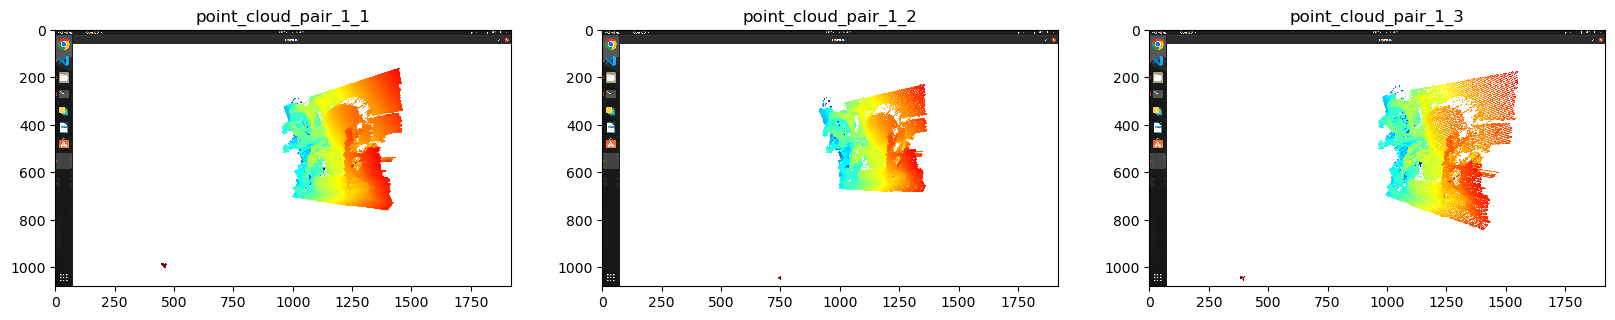

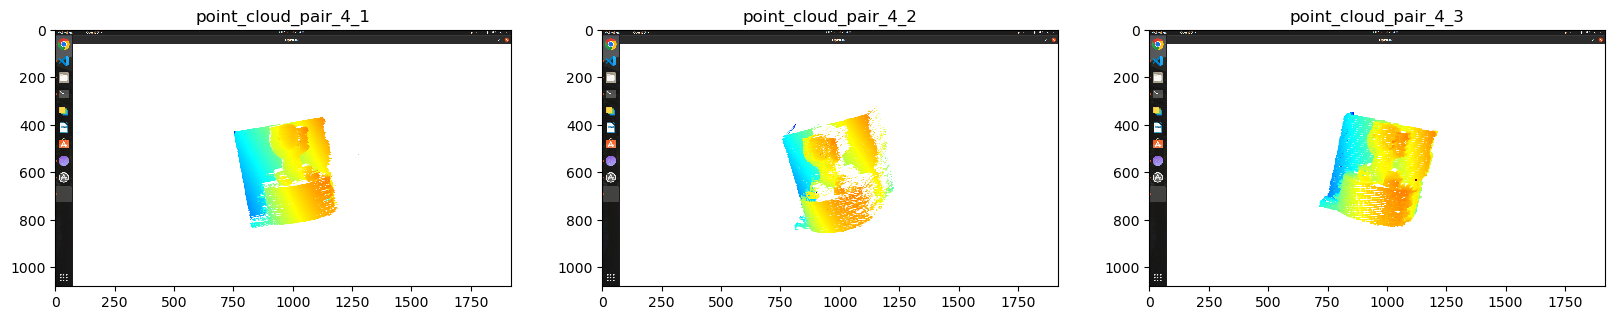

In [18]:
## Pair 1 
pc_1_1=cv2.imread("../dataset/pair_1/results/point_clouds_normals/point_cloud_1.png")
pc_1_2=cv2.imread("../dataset/pair_1/results/point_clouds_normals/point_cloud_2.png")
pc_1_3=cv2.imread("../dataset/pair_1/results/point_clouds_normals/point_cloud_3.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,3, 1)
plt.imshow(cv2.cvtColor(pc_1_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('point_cloud_pair_1_1', fontsize=12)
f1.add_subplot(1,3, 2)
plt.imshow(cv2.cvtColor(pc_1_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('point_cloud_pair_1_2', fontsize=12)
f1.add_subplot(1,3, 3)
plt.imshow(cv2.cvtColor(pc_1_3, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('point_cloud_pair_1_3', fontsize=12)

## Pair 4 
pc_4_1=cv2.imread("../dataset/pair_4/results/point_clouds_normals/point_cloud_1.png")
pc_4_2=cv2.imread("../dataset/pair_4/results/point_clouds_normals/point_cloud_2.png")
pc_4_3=cv2.imread("../dataset/pair_4/results/point_clouds_normals/point_cloud_3.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,3, 1)
plt.imshow(cv2.cvtColor(pc_4_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('point_cloud_pair_4_1', fontsize=12)
f1.add_subplot(1,3, 2)
plt.imshow(cv2.cvtColor(pc_4_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('point_cloud_pair_4_2', fontsize=12)
f1.add_subplot(1,3, 3)
plt.imshow(cv2.cvtColor(pc_4_3, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('point_cloud_pair_4_3', fontsize=12)


Surface Normal Visulization

Text(0.5, 1.0, 'Normals_pair_4_2')

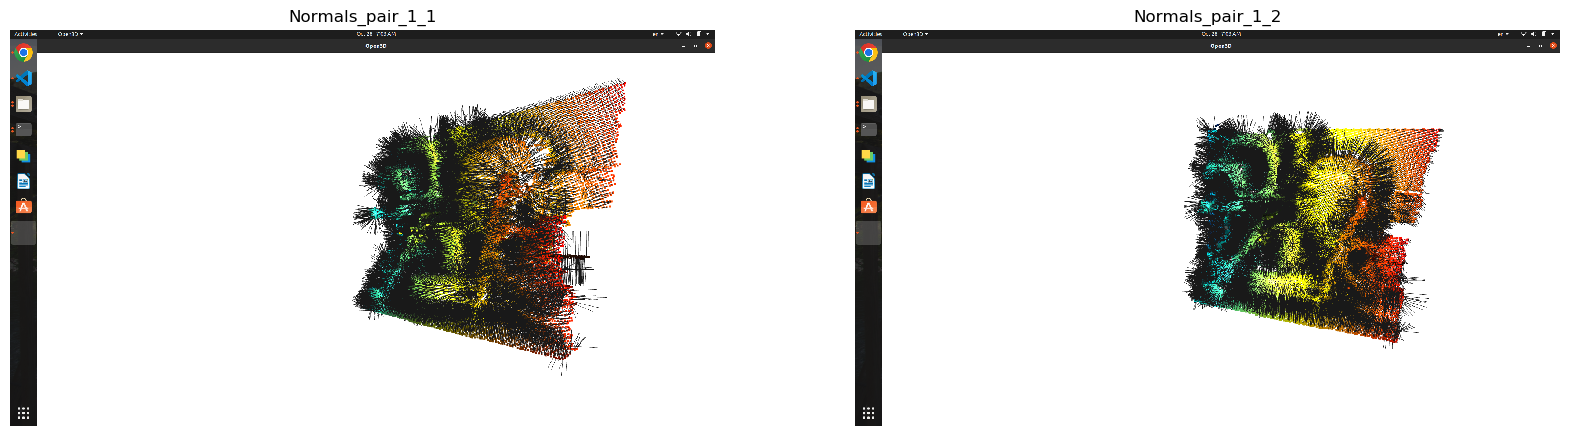

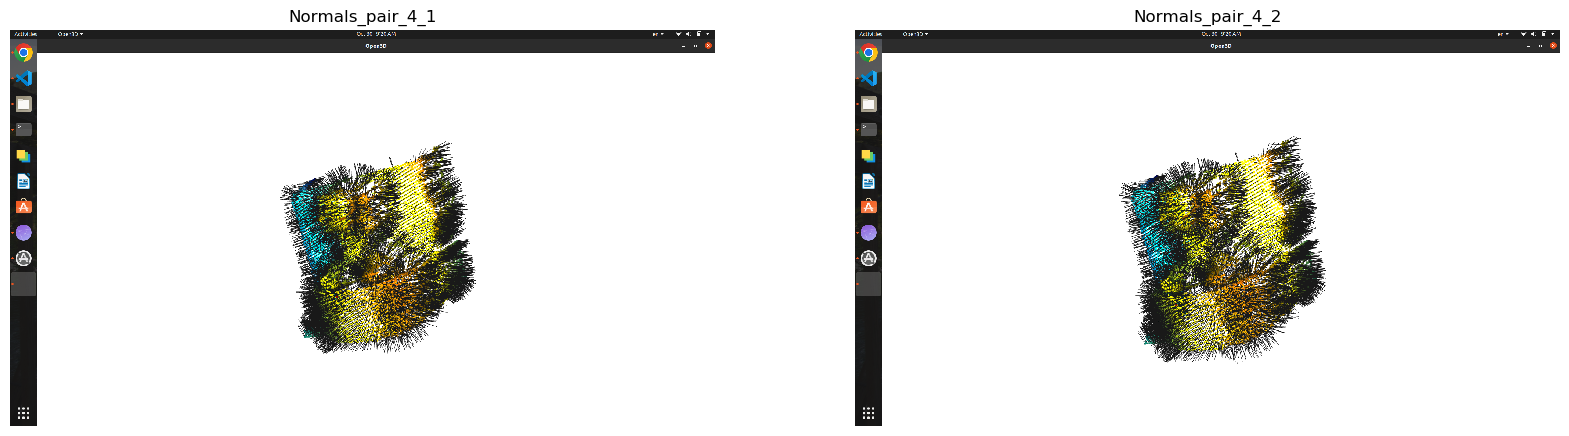

In [19]:
## Pair 1 
normals_1_1=cv2.imread("../dataset/pair_1/results/point_clouds_normals/normals_1.png")
normals_1_2=cv2.imread("../dataset/pair_1/results/point_clouds_normals/normals_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(normals_1_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('Normals_pair_1_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(normals_1_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('Normals_pair_1_2', fontsize=12)

## Pair 4 
normals_4_1=cv2.imread("../dataset/pair_4/results/point_clouds_normals/normals_1.png")
normals_4_2=cv2.imread("../dataset/pair_4/results/point_clouds_normals/normals_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(normals_4_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('Normals_pair_4_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(normals_4_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('Normals_pair_4_2', fontsize=12)


Triangulation Visualization

Text(0.5, 1.0, '3D_Triangulation_pair_4_2')

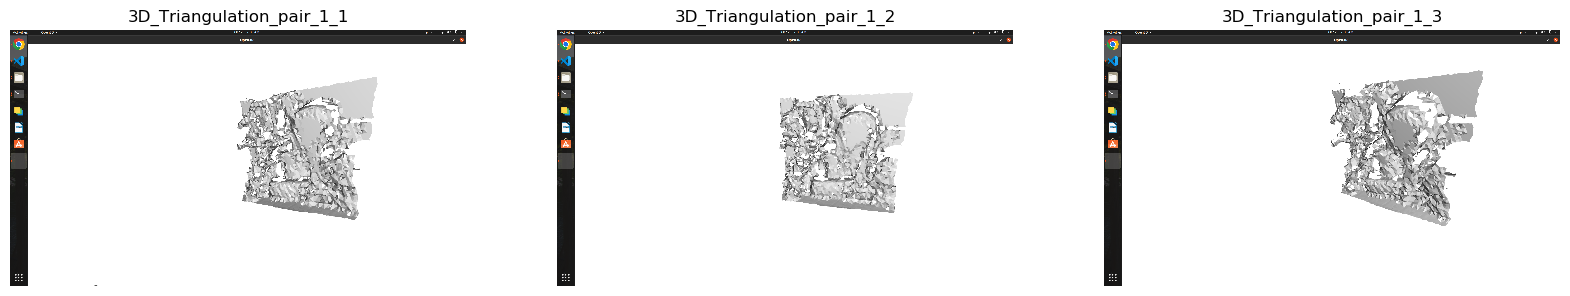

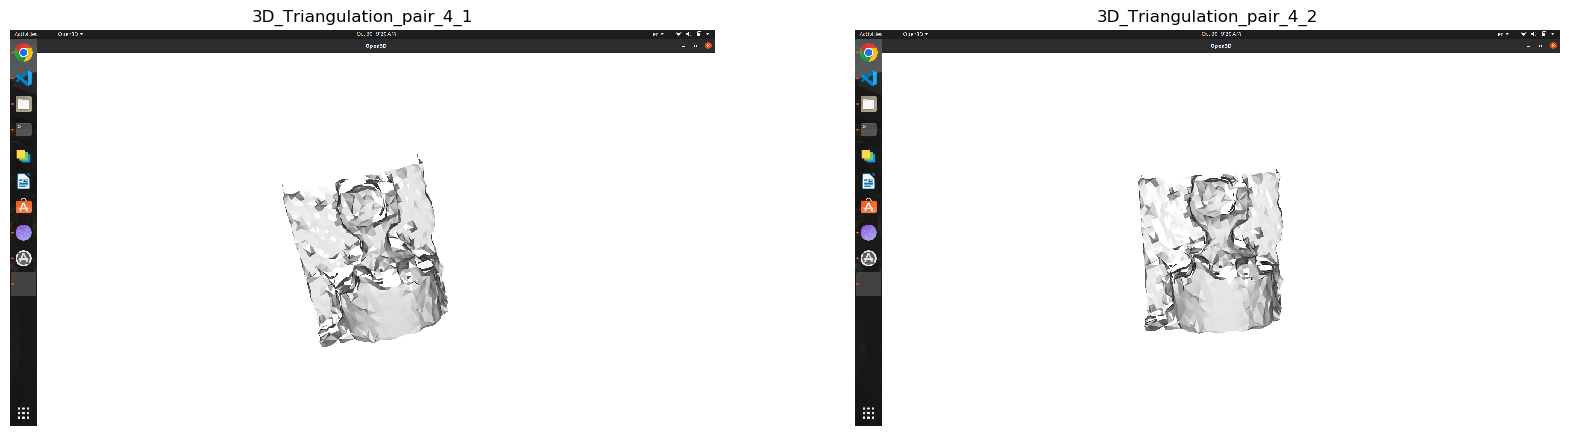

In [3]:
## Pair 1 
triang_1_1=mpimg.imread("../dataset/pair_1/results/point_clouds_normals/triang_1.png")
triang_1_2=mpimg.imread("../dataset/pair_1/results/point_clouds_normals/triang_2.png")
triang_1_3=mpimg.imread("../dataset/pair_1/results/point_clouds_normals/triang_3.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,3, 1)
plt.imshow(triang_1_1)
plt.axis("off")
plt.title('3D_Triangulation_pair_1_1', fontsize=12)
f1.add_subplot(1,3, 2)
plt.imshow(triang_1_2)
plt.axis("off")
plt.title('3D_Triangulation_pair_1_2', fontsize=12)
f1.add_subplot(1,3, 3)
plt.imshow(triang_1_3)
plt.axis("off")
plt.title('3D_Triangulation_pair_1_3', fontsize=12)

## Pair 4
triang_4_1=mpimg.imread("../dataset/pair_4/results/point_clouds_normals/triang_1.png")
triang_4_2=mpimg.imread("../dataset/pair_4/results/point_clouds_normals/triang_2.png")
f1 = plt.figure(figsize=(20, 10))
f1.add_subplot(1,2, 1)
plt.imshow(triang_4_1)
plt.axis("off")
plt.title('3D_Triangulation_pair_4_1', fontsize=12)
f1.add_subplot(1,2, 2)
plt.imshow(triang_4_2)
plt.axis("off")
plt.title('3D_Triangulation_pair_4_2', fontsize=12)